In [72]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics
import seaborn as sns
import statsmodels.api as sm

In [299]:
data = pd.read_csv('Lawsuit.csv')

In [300]:
data

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95
0,1,1,1,0,0,7.4,9,3,77836,84612
1,2,1,1,0,0,6.7,10,2,69994,78497
2,3,1,1,0,0,8.1,6,1,62872,67756
3,4,1,1,1,1,5.1,27,3,155196,173220
4,5,1,1,0,0,7.0,10,3,89268,96099
...,...,...,...,...,...,...,...,...,...,...
256,257,6,0,1,1,2.9,8,2,297174,323699
257,258,6,0,1,1,2.6,9,3,308081,339664
258,259,6,0,1,1,2.8,8,1,211269,241577
259,260,6,0,1,1,2.4,2,1,210801,233905


In [301]:
data['Rank']

0      3
1      2
2      1
3      3
4      3
      ..
256    2
257    3
258    1
259    1
260    1
Name: Rank, Length: 261, dtype: int64

In [302]:
status=[]
for i in range(261):
    if data['Rank'][i]==3:
        status.append(1)
    else:
        status.append(0)

        

In [303]:
data['Status']=status

In [304]:
data

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,Status
0,1,1,1,0,0,7.4,9,3,77836,84612,1
1,2,1,1,0,0,6.7,10,2,69994,78497,0
2,3,1,1,0,0,8.1,6,1,62872,67756,0
3,4,1,1,1,1,5.1,27,3,155196,173220,1
4,5,1,1,0,0,7.0,10,3,89268,96099,1
...,...,...,...,...,...,...,...,...,...,...,...
256,257,6,0,1,1,2.9,8,2,297174,323699,0
257,258,6,0,1,1,2.6,9,3,308081,339664,1
258,259,6,0,1,1,2.8,8,1,211269,241577,0
259,260,6,0,1,1,2.4,2,1,210801,233905,0


In [305]:
data['Gender'].value_counts()

1    155
0    106
Name: Gender, dtype: int64

In [306]:
data['Status'].value_counts()

0    176
1     85
Name: Status, dtype: int64

In [307]:
data.describe()

,ID,Dept,Gender,Clin,Cert,Prate,Exper,Rank,Sal94,Sal95,Status
count,261.00000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,131.00000,3.651341,0.593870,0.613027,0.720307,4.932184,10.229885,1.896552,153593.344828,168906.655172,0.325670
std,75.48841,1.796655,0.492053,0.487993,0.449711,1.944430,6.227176,0.864262,80469.666720,88778.425411,0.469525
min,1.00000,1.000000,0.000000,0.000000,0.000000,1.300000,1.000000,1.000000,34514.000000,38675.000000,0.000000
25%,66.00000,2.000000,0.000000,0.000000,0.000000,3.200000,6.000000,1.000000,90771.000000,99972.000000,0.000000
50%,131.00000,4.000000,1.000000,1.000000,1.000000,4.400000,9.000000,2.000000,133284.000000,148117.000000,0.000000
75%,196.00000,5.000000,1.000000,1.000000,1.000000,6.900000,14.000000,3.000000,200543.000000,218955.000000,1.000000
max,261.00000,6.000000,1.000000,1.000000,1.000000,8.700000,37.000000,3.000000,428876.000000,472589.000000,1.000000


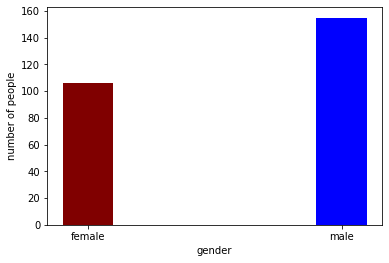

In [308]:
gender=['female','male']
values=[106,155]
plt.bar(gender, values, color =['maroon','blue'],width=0.2) 
plt.xlabel("gender") 
plt.ylabel("number of people") 
plt.show()

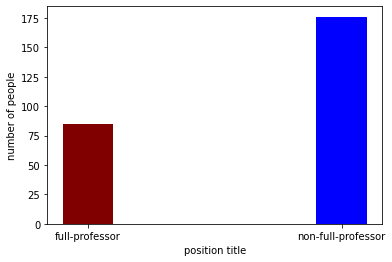

In [309]:
title=['full-professor','non-full-professor']
values=[85,176]
plt.bar(title, values, color =['maroon','blue'],width=0.2) 
plt.xlabel("position title") 
plt.ylabel("number of people") 
plt.show()

In [310]:
full_professor = data[data['Status']==1]

In [311]:
full_professor['Gender'].value_counts()

1    69
0    16
Name: Gender, dtype: int64

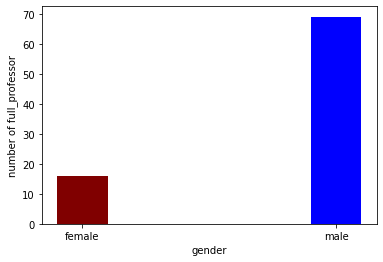

In [312]:
gender=['female','male']
values=[16,69]
plt.bar(gender, values, color =['maroon','blue'],width=0.2) 
plt.xlabel("gender") 
plt.ylabel("number of full_professor") 
plt.show()

In [313]:
data['Status'].value_counts()

0    176
1     85
Name: Status, dtype: int64

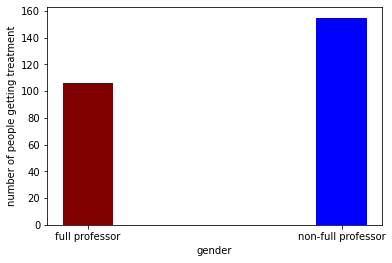

In [314]:
gender=['full professor','non-full professor']
values=[106,155]
plt.bar(gender, values, color =['maroon','blue'],width=0.2) 
plt.xlabel("gender") 
plt.ylabel("number of people getting treatment") 
plt.show()

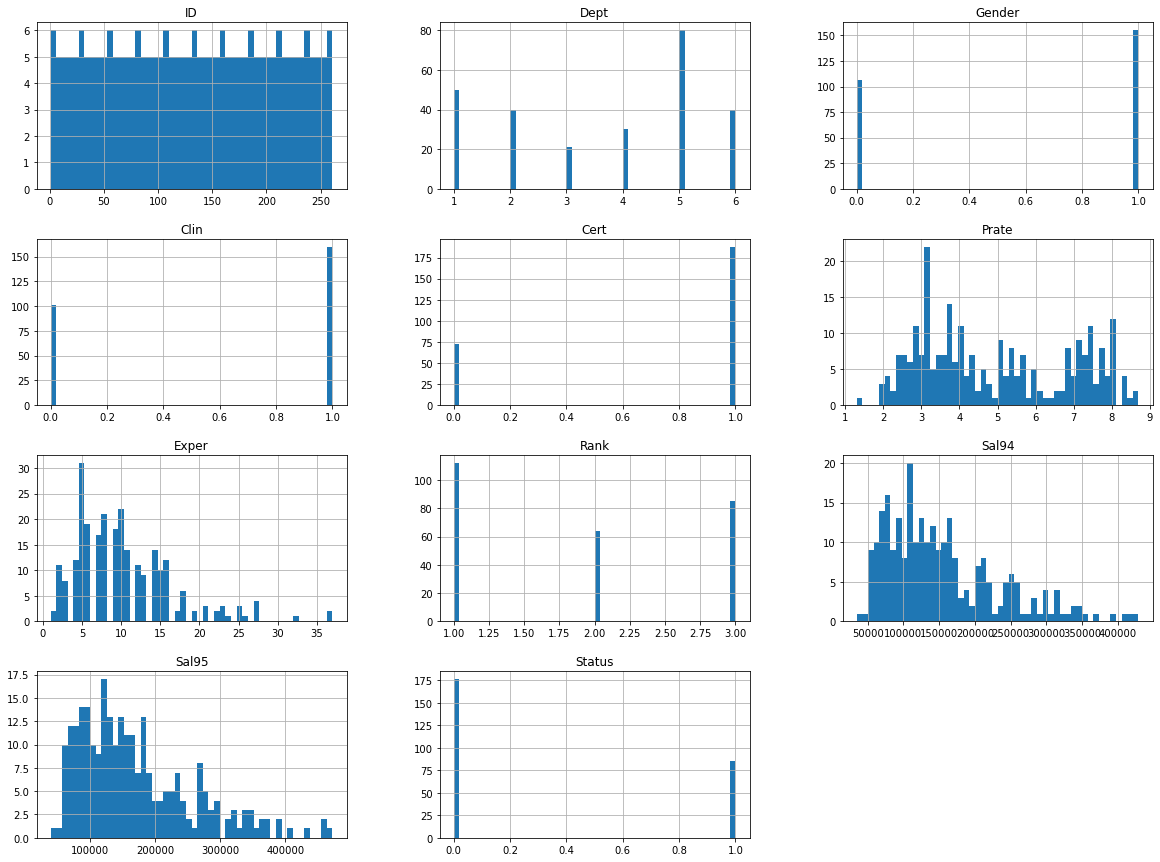

In [315]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [316]:
department = pd.get_dummies(data.Dept,prefix='dept')

In [218]:
clin = pd.get_dummies(data.Clin,prefix='clin')

In [219]:
cert = pd.get_dummies(data.Cert,prefix='cert')

In [317]:
data = data.join(department)

In [220]:
data = data.join(clin)

In [221]:
data = data.join(cert)

In [318]:
data.drop(['Dept'],axis=1,inplace = True)

In [319]:
data.drop(['Rank'],axis=1,inplace=True)

In [320]:
data1 = data

In [321]:
data

,ID,Gender,Clin,Cert,Prate,Exper,Sal94,Sal95,Status,dept_1,dept_2,dept_3,dept_4,dept_5,dept_6
0,1,1,0,0,7.4,9,77836,84612,1,1,0,0,0,0,0
1,2,1,0,0,6.7,10,69994,78497,0,1,0,0,0,0,0
2,3,1,0,0,8.1,6,62872,67756,0,1,0,0,0,0,0
3,4,1,1,1,5.1,27,155196,173220,1,1,0,0,0,0,0
4,5,1,0,0,7.0,10,89268,96099,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,257,0,1,1,2.9,8,297174,323699,0,0,0,0,0,0,1
257,258,0,1,1,2.6,9,308081,339664,1,0,0,0,0,0,1
258,259,0,1,1,2.8,8,211269,241577,0,0,0,0,0,0,1
259,260,0,1,1,2.4,2,210801,233905,0,0,0,0,0,0,1


In [322]:
y.value_counts()

0    176
1     85
Name: Status, dtype: int64

In [323]:
y = data['Status']

In [324]:
data.drop(['Status'],axis=1,inplace=True)

In [325]:
data.drop(['ID'],axis=1, inplace=True)

In [326]:
np.random.seed(44)
N=len(data)
shuffled_indices=np.random.permutation(N)
print(len(shuffled_indices)==N)

True


In [327]:
train_indices=shuffled_indices[:int(N*0.7)]
test_indices=shuffled_indices[int(N*0.7):]

In [328]:
train_x=data.iloc[train_indices]
test_x=data.iloc[test_indices]
print(len(train_x+test_x)==N)

True


In [329]:
train_y = y[train_indices]
test_y=y[test_indices]

In [330]:
clf=LogisticRegression().fit(train_x,train_y)

In [331]:
y_pred = pd.Series(clf.predict(test_x))

In [332]:
test_y=test_y.reset_index(drop=True)
z=pd.concat([test_y,y_pred],axis=1)

In [333]:
z.columns=['True','Prediction']
z.head()

,True,Prediction
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


Text(0.5, 15.0, 'Predicted')

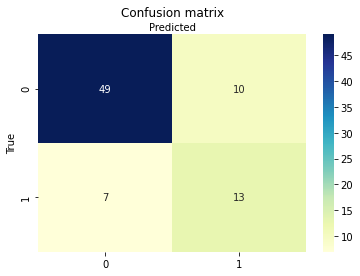

In [334]:
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [335]:
def give_metrics(test_y,y_pred):
    accuracy=metrics.accuracy_score(test_y, y_pred)
    print("Accuracy:", accuracy)
    precision=metrics.precision_score(test_y, y_pred)
    print("Precision:", precision)
    recall=metrics.recall_score(test_y, y_pred)
    print("Recall:", recall)
    f1=1/((1/precision)+(1/recall))
    print('f1 score:',1/((1/precision)+(1/recall)))
    return f1
#metric for first model:
give_metrics(test_y,y_pred)

Accuracy: 0.7848101265822784
Precision: 0.5652173913043478
Recall: 0.65
f1 score: 0.3023255813953489


0.3023255813953489

In [336]:
logit_model1=sm.Logit(train_y,train_x).fit()

Optimization terminated successfully.
         Current function value: 0.315447
         Iterations 8


In [337]:
print(logit_model1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.516     
Dependent Variable: Status           AIC:              140.8226  
Date:               2021-05-02 22:40 BIC:              182.4747  
No. Observations:   182              Log-Likelihood:   -57.411   
Df Model:           12               LL-Null:          -118.62   
Df Residuals:       169              LLR p-value:      2.0359e-20
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
             Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
Gender        1.6337    0.5983   2.7306  0.0063    0.4611   2.8064
Clin         -1.5355    1.2674  -1.2115  0.2257   -4.0196   0.9486
Cert         -0.2158    0.5869  -0.3678  0.7130   -1.3662   0.9345
Prate        -0.1613    0.5545

In [338]:
z.shape

(79, 2)

In [339]:
true_non_professor_index=[]
true_professor_index=[]
false_professor_index=[]
false_non_professor_index=[]

In [340]:
for i in range(32):
    if y_pred[i]== test_y[i] == 0:
        true_non_professor_index.append(i)
    elif y_pred[i]==test_y[i]==1:
        true_professor_index.append(i)
    elif y_pred[i]==1 and test_y[i]==0:
        false_non_professor_index.append(i)
    else:
        false_professor_index.append(i)

In [341]:
test_x.iloc[true_non_professor_index]['Gender'].value_counts()

0    13
1     7
Name: Gender, dtype: int64

In [342]:
test_x.iloc[true_professor_index]

,Gender,Clin,Cert,Prate,Exper,Sal94,Sal95,dept_1,dept_2,dept_3,dept_4,dept_5,dept_6
231,1,1,1,2.4,27,419129,472589,0,0,0,0,0,1
215,0,0,1,5.8,23,204279,227790,0,0,0,0,1,0
182,1,1,1,4.0,18,262090,289778,0,0,0,0,1,0
21,1,0,0,7.1,14,97104,104090,1,0,0,0,0,0
53,1,1,1,5.5,25,140315,150710,0,1,0,0,0,0
229,1,1,1,2.4,22,393408,435572,0,0,0,0,0,1
8,1,0,0,7.7,18,81271,85437,1,0,0,0,0,0
56,1,1,1,6.1,27,133284,151373,0,1,0,0,0,0
